# Alura - Data Science - Analisis de Datos con Python

### Dia 3

## 1. Importacion de librerias necesarias

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Cargar CSV

**Nota:** Los siguientes pasos son una reiteración del Notebook anterior.

In [7]:
# Load Dataset
df = pd.read_csv('Data/inmuebles_bogota.csv')

## 3. Limpieza del dataset

### 3.1 Renombrar columnas a palabras sin acentos

In [8]:
rename_columns = {'Baños':'Banos', 'Área':'Area'}
df.rename(columns=rename_columns, inplace=True)

### 3.2 Eliminacion de caracteres especiales y cambio de tipo a la columan **Valor**

In [9]:
df['Precio'] = df['Valor'].str.split(expand=True)[1]
df['Precio'] = df['Precio'].str.replace('.', '')
# Variable en millones
df['Precio'] = df['Precio'].astype(float) / 1000000

## 4. Información general

In [10]:
df['Precio_Metro_cuadrado'] = df['Precio'] / df['Area']

In [11]:
df.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Metro_cuadrado
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.142857
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.0,3.941176
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,7.777778
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.779221
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,7.578125


## 5. Crear configuracion de la clase anterior

In [12]:
new_df = df.groupby('Barrio').sum()
new_df['Metro_Cuadrado_Barrio'] = new_df['Precio'] / new_df['Area']

m2 = dict(new_df['Precio_Metro_cuadrado'])

df['Metro_cuadrado_Barrio'] = df['Barrio']
df['Metro_cuadrado_Barrio'] = df['Metro_cuadrado_Barrio'].map(m2)

In [13]:
df.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Metro_cuadrado,Metro_cuadrado_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.142857,4049.160722
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.0,3.941176,120.235833
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,7.777778,1713.076034
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.779221,6334.040471
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,7.578125,652.906161


## 5. Ejercicio en clase

In [14]:
df.head(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Precio,Precio_Metro_cuadrado,Metro_cuadrado_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.0,5.142857,4049.160722
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.0,3.941176,120.235833
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.0,7.777778,1713.076034
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.0,5.779221,6334.040471
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.0,7.578125,652.906161


In [15]:
Top_Barrios = df['Barrio'].value_counts()[:10].index
Top_Barrios

Index(['Usaquén', 'Zona Noroccidental', 'Bosa', 'Kennedy', 'Cedritos',
       'Barrios Unidos', 'Engativa', 'Suba', 'Santa Barbara', 'Chapinero'],
      dtype='object', name='Barrio')

In [16]:
new_df.reset_index(inplace=True)

In [17]:
new_df

,Barrio,Tipo,Descripcion,Habitaciones,Banos,Area,UPZ,Valor,Precio,Precio_Metro_cuadrado,Metro_Cuadrado_Barrio
0,Alameda,Apartamento,Apartamento en venta en Alameda,3,2,97,Engativá,$ 580.000.000,580.000000,5.979381,5.979381
1,Alhambra,ApartamentoApartamentoCasaCasaCasaApartamentoC...,Apartamento en venta en AlhambraApartamento en...,51,50,3237,La AlhambraLa AlhambraLa AlhambraLa AlhambraLa...,$ 400.000.000$ 780.000.000$ 1.100.000.000$ 1.4...,12790.000000,73.556204,3.951189
2,Andes Norte,CasaApartamentoCasaApartamentoApartamentoApart...,Casa en venta en Andes NorteApartamento en ven...,21,20,874,La FlorestaLa FlorestaLa FlorestaLa FlorestaLa...,$ 750.000.000$ 585.000.000$ 750.000.000$ 1.260...,4967.000000,42.352453,5.683066
3,Antonio Nariño,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Antonio NariñoApartame...,207,120,7827,RestrepoRestrepoRestrepoRestrepoRestrepoRestre...,$ 175.000.000$ 122.000.000$ 850.000.000$ 245.0...,22042.650000,169.470608,2.816232
4,Barrancas,ApartamentoApartamentoApartamentoApartamentoAp...,Apartamento en venta en BarrancasApartamento e...,43,32,1053,San Cristóbal NorteSan Cristóbal NorteSan Cris...,$ 238.000.000$ 238.000.000$ 238.000.000$ 233.0...,4712.000000,66.239361,4.474834
...,...,...,...,...,...,...,...,...,...,...,...
144,Villa Maria,CasaCasaCasaCasaCasaApartamentoCasaCasaCasaCas...,Casa en venta en Villa MariaCasa en venta en V...,61,48,2693,El RincónEl RincónEl RincónEl RincónEl RincónE...,$ 240.000.000$ 437.000.000$ 437.000.000$ 437.0...,5237.000000,26.578643,1.944671
145,Villas De Granada,ApartamentoApartamentoCasaApartamentoApartamen...,Apartamento en venta en Villas De GranadaApart...,76,51,1905,Garcés NavasGarcés NavasGarcés NavasGarcés Nav...,$ 215.625.000$ 230.000.000$ 260.000.000$ 250.0...,6210.625000,69.714480,3.260171
146,Villemar,ApartamentoApartamentoApartamentoCasaApartamen...,Apartamento en venta en VillemarApartamento en...,53,37,1384,FontibónFontibónFontibónFontibónFontibónFontib...,$ 360.000.000$ 205.000.000$ 245.000.000$ 600.0...,5469.000000,71.814550,3.951590
147,Zona Franca,Casa,Casa en venta en Zona Franca,2,1,54,Zona Franca,$ 160.000.000,160.000000,2.962963,2.962963


E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


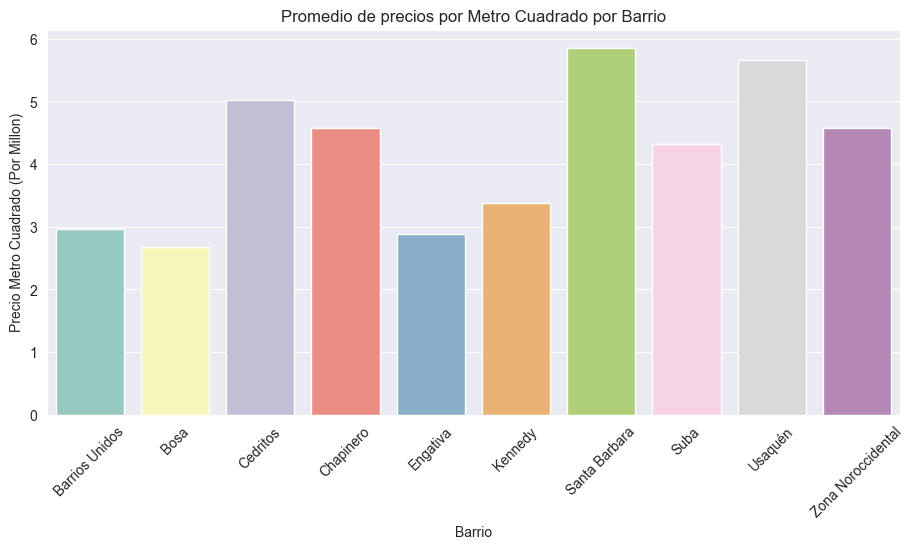

In [18]:
plt.figure(figsize=(11,5))
sns.barplot(data=new_df.query('Barrio in @Top_Barrios'), x='Barrio', y='Metro_Cuadrado_Barrio', palette='Set3')
plt.xlabel('Barrio')
plt.ylabel('Precio Metro Cuadrado (Por Millon)')
plt.title('Promedio de precios por Metro Cuadrado por Barrio')
plt.tick_params(axis='x', rotation=45)
plt.show()

E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


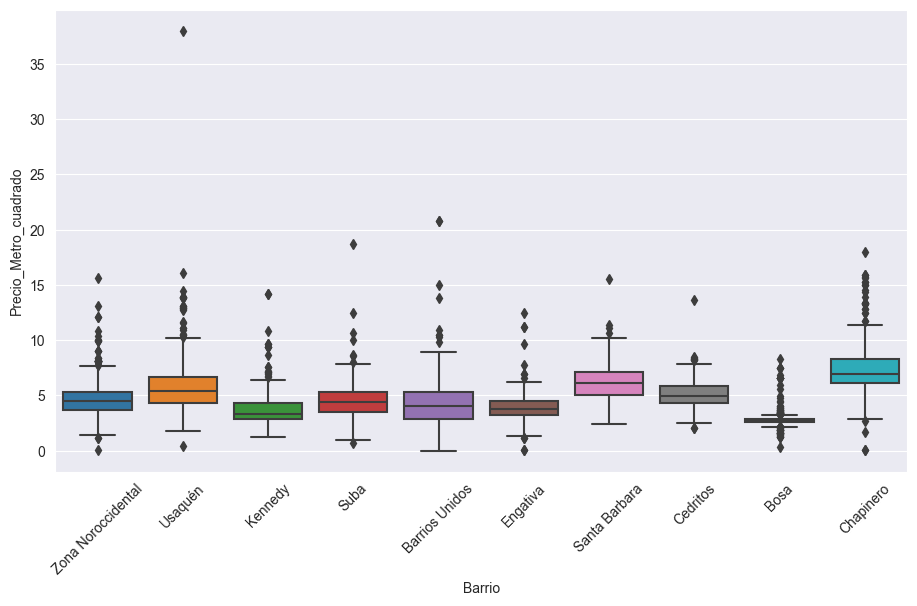

In [19]:
plt.figure(figsize=(11, 6))
ax = sns.boxplot(x='Barrio', y='Precio_Metro_cuadrado', data=df.query('Barrio in @Top_Barrios'))
ax.tick_params(axis='x', rotation=45)
plt.show()

E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


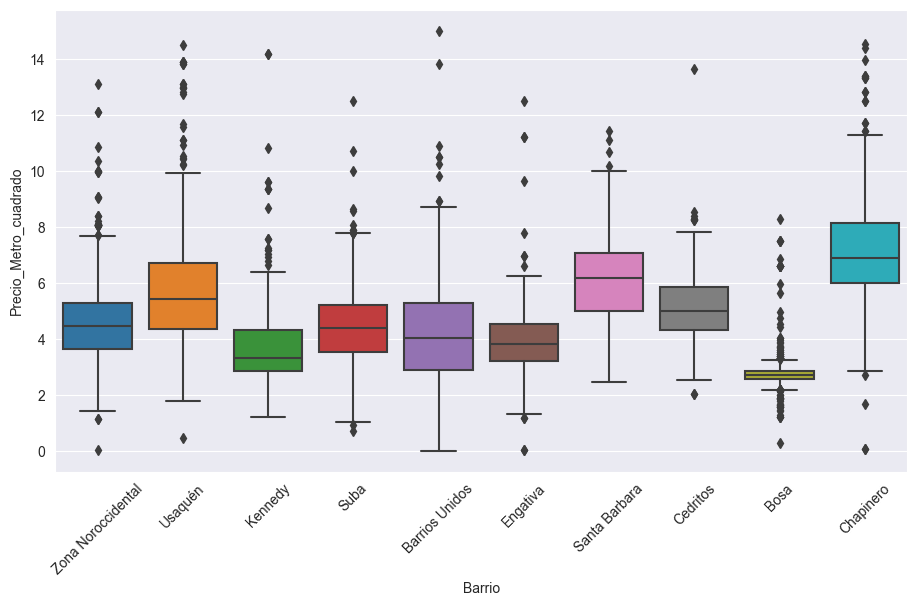

In [20]:
plt.figure(figsize=(11, 6))
ax = sns.boxplot(x='Barrio', y='Precio_Metro_cuadrado', data=df.query('Barrio in @Top_Barrios & Precio_Metro_cuadrado < 15'))
ax.tick_params(axis='x', rotation=45)
plt.show()

E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Users\DiegoDG\Documents\Projects\Python General\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


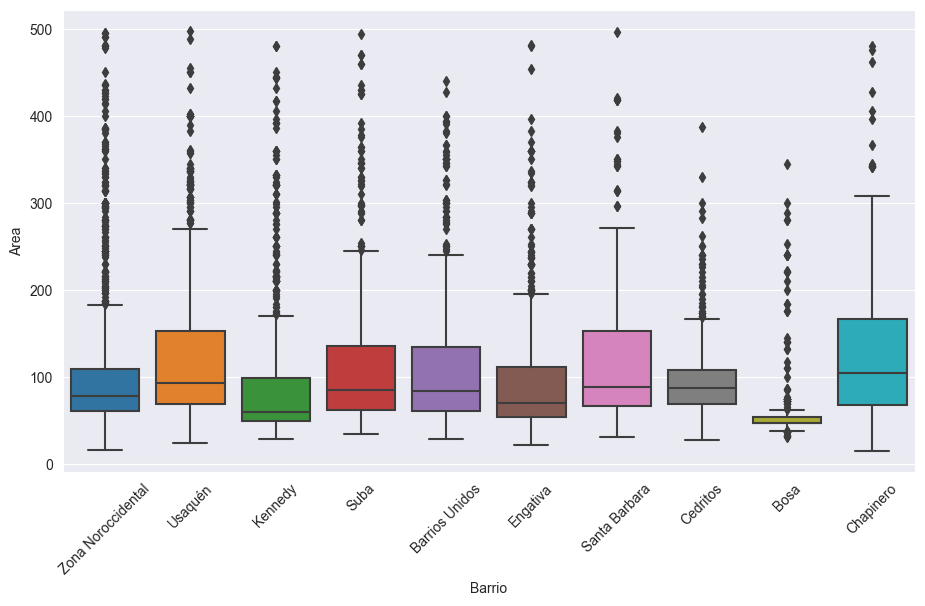

In [21]:
plt.figure(figsize=(11, 6))
ax = sns.boxplot(x='Barrio', y='Area', data=df.query('Barrio in @Top_Barrios & Area < 500'))
ax.tick_params(axis='x', rotation=45)
plt.show()